In [ ]:
#Amazon Bestselling Books Analysis with Python

In [1]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re

Seaborn verion 0.13.1


In [2]:
df = pd.read_csv("/content/bestsellers with categories.csv")

In [ ]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


In [ ]:
df.describe()

,User_Rating,Reviews,Price,Year,name_len,punc%
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000,41.549091,3.989611
std,0.226980,11731.132017,10.842262,3.165156,25.155117,3.509989
min,3.300000,37.000000,0.000000,2009.000000,4.000000,0.000000
25%,4.500000,4058.000000,7.000000,2011.000000,20.000000,1.266000
50%,4.700000,8580.000000,11.000000,2014.000000,36.000000,3.774000
75%,4.800000,17253.250000,16.000000,2017.000000,64.000000,5.556000
max,4.900000,87841.000000,105.000000,2019.000000,106.000000,20.000000


In [ ]:
df.isnull()

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Name           0
Author         0
User_Rating    0
Reviews        0
Price          0
Year           0
Genre          0
name_len       0
punc%          0
dtype: int64

In [ ]:

#For total number of different books
len(df.Name.unique())



351

In [ ]:
fiction_df_values=df[df.Genre=='Fiction']
len(fiction_df_values)

240

In [ ]:
Nfiction_df=df[df.Genre=='Non Fiction']
len(Nfiction_df)


310

In [ ]:
df['estimated_profit']=df.Reviews*df.Price


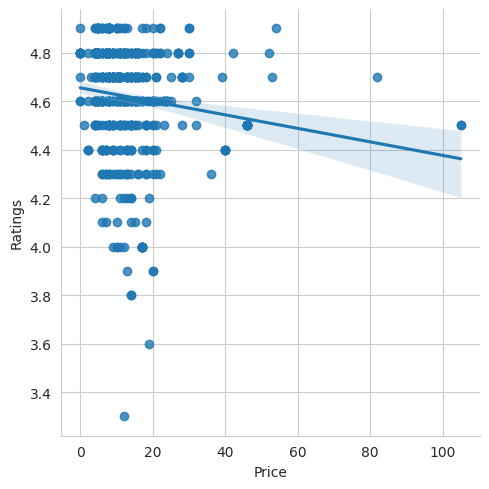

In [ ]:
sns.lmplot(y='User_Rating',x='Price',data=df)
plt.ylabel('Ratings')
plt.xlabel('Price');

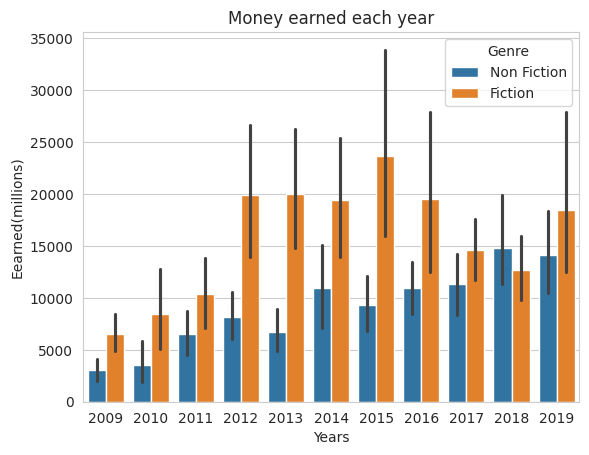

In [ ]:
sns.barplot(x=df.Year,y=df.Reviews,hue=df.Genre)
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');



In [ ]:
rich_df=df.groupby('Name')['estimated_profit'].max()
rich_df=rich_df.sort_values(ascending=False).head(10)
rich_df


Name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

In [ ]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
Earning_Graph=df.groupby('Year')['estimated_profit'].sum()

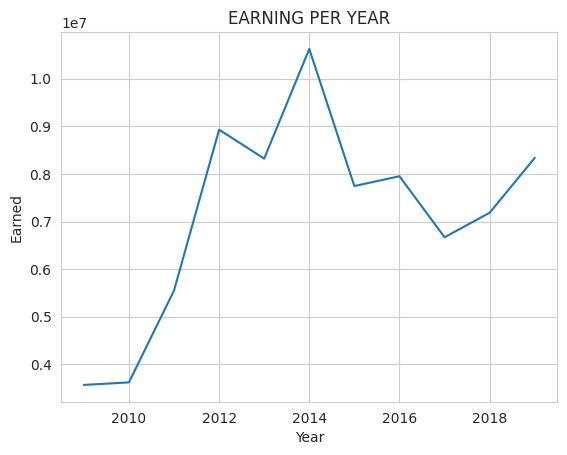

<Figure size 1200x1200 with 0 Axes>

In [ ]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));


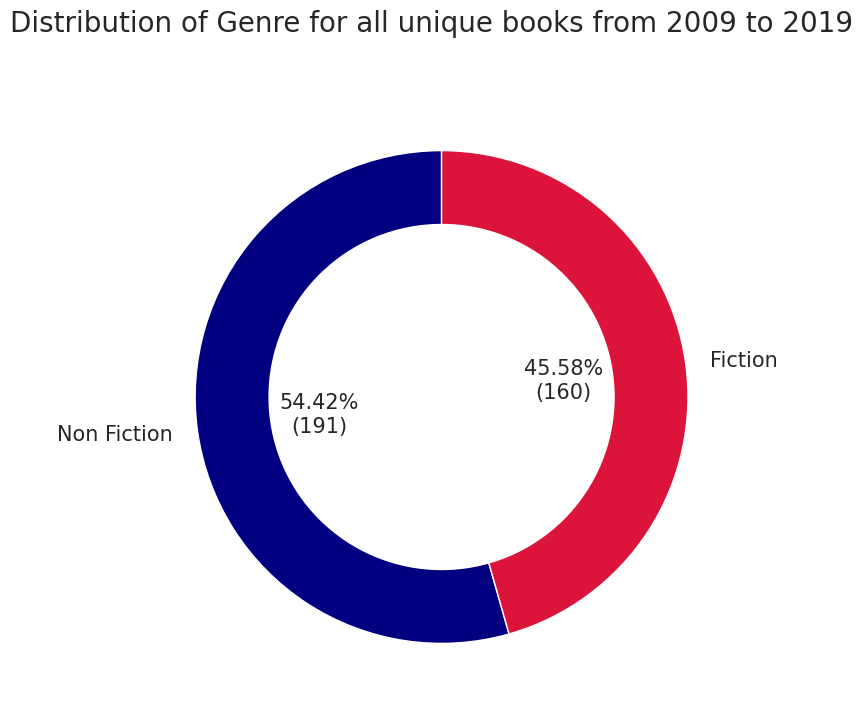

In [ ]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

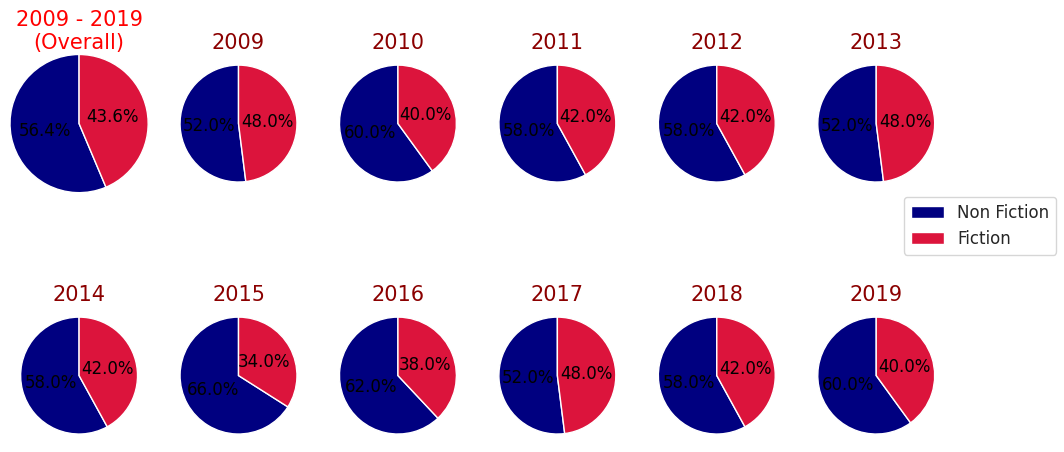

In [ ]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'Black'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='red', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                  startangle=90, textprops={'size': 12,'color': 'Black'},
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                startangle=90, textprops={'size': 12,'color': 'Black'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

<ipython-input-7-8aa8c378c608>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
<ipython-input-7-8aa8c378c608>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


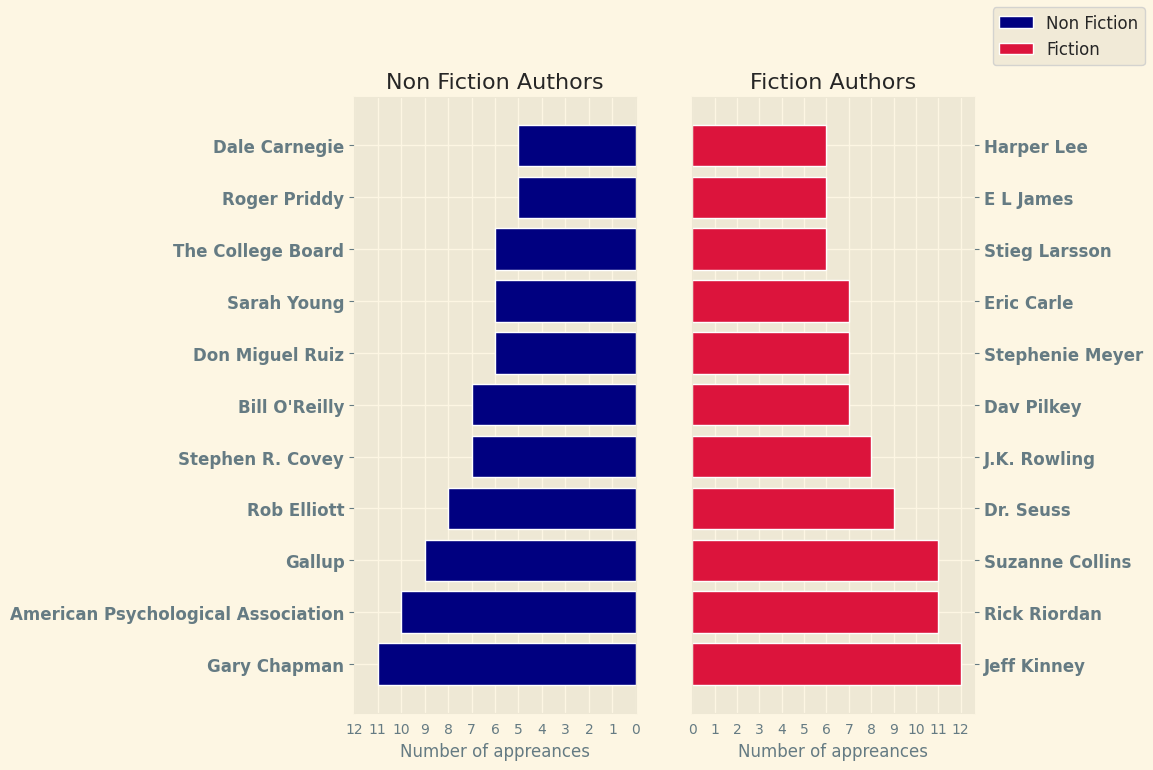

In [ ]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))

    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')

    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')

    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)

plt.show()

<ipython-input-8-c10a06f5f4d7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


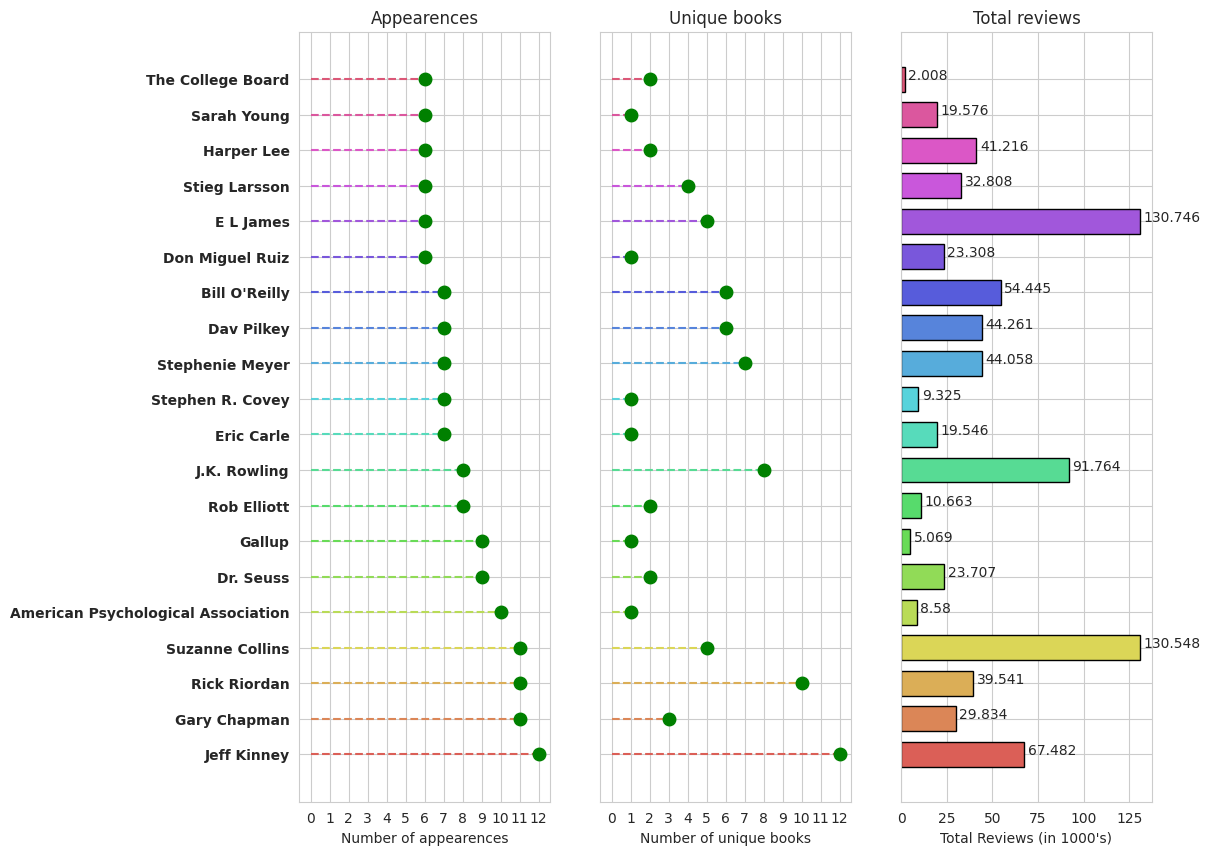

In [ ]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

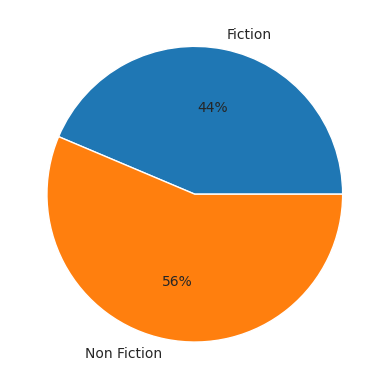

In [ ]:
plt.pie([240,310],labels=['Fiction','Non Fiction'],autopct='%.0f%%');

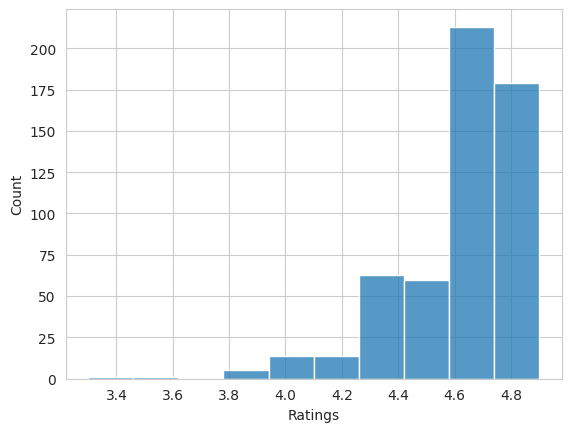

In [ ]:
#Distribution of ratings
sns.histplot(data=df.User_Rating,bins=10)
plt.xlabel("Ratings");

In [ ]:
authors=df.groupby('Author')['estimated_profit'].sum()


In [ ]:
authors=authors.sort_values(ascending=False).head(10)
authors


Author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
J.K. Rowling                          2210010
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
Name: estimated_profit, dtype: int64

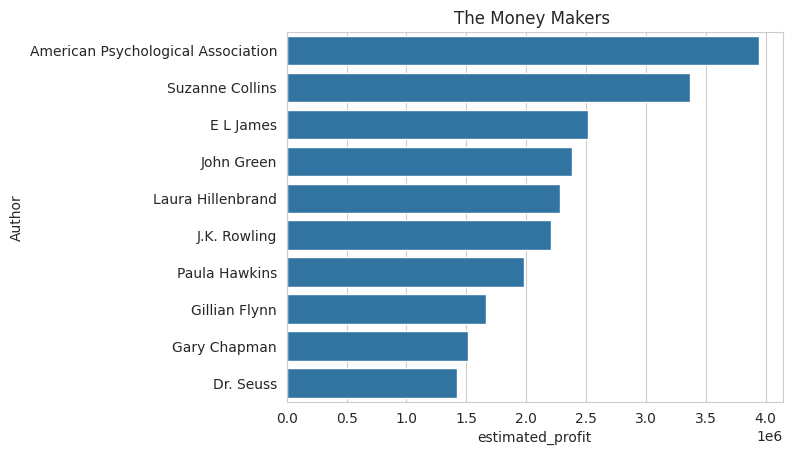

In [ ]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ');